# Configurations and Installations

1. Have directory organised as: all test images in 'test' folder and all train images in 'train' folder
2. Have **test.json** and **train.json** output files in cd

In [1]:
#mounting Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#setting current working directory to particular folder of Google Drive
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [3]:
#installing ppyaml
!pip install pyyaml==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp310-cp310-linux_x86_64.whl size=44090 sha256=911d91e4473d4e8bb398cf55d20b8378b9a394b0287245c869544af7c1e98efd
  Stored in directory: /root/.cache/pip/wheels/70/83/31/975b737609aba39a4099d471d5684141c1fdc3404f97e7f68a
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.12.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
flax 0.6.9 requires PyYAML>=5.4.1, but you have pyyaml 5.1 which is incompatibl

In [4]:
#Import torch and identifying version for torch and cuda
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.0.1+cu118
True


In [5]:
#Installation of detectron2 (for the corresponding cu101 and torch1.13 version)
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu116/torch1.13/index.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu116/torch1.13/index.html
ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2


In [6]:
# As Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# Install directly from source file instead

!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-lrjvo9yd
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-lrjvo9yd
  Resolved https://github.com/facebookresearch/detectron2.git to commit 2c6c380f94a27bd8455a39506c9105f652b9f760
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filena

#Model Training, Testing, and Evaluation

Referenced from (Training, Testing) - https://www.youtube.com/watch?v=GoItxr16ae8

Referenced from (Evlauation) - https://roboticseabass.com/2020/11/22/object-detection-and-instance-segmentation-with-detectron2/


In [7]:
#To check whether annotations detected correctly by Detectron2
#For this, the following segment of code assists with checking and configuration of steps related to this

#import dataset catalogue and metadata catalogue from Detectron2
from detectron2.data import DatasetCatalog, MetadataCatalog

#import Visualizer to visualize annotations and predictions
from detectron2.utils.visualizer import Visualizer

#import getconfig method to load configuration for object detection model
from detectron2.config import get_cfg

#import modelzoo to load pre-trained model checkpoints for object detection
from detectron2 import model_zoo

#import colour modes
from detectron2.utils.visualizer import ColorMode

#import other libraries to load images and plot images
import random
import cv2
import matplotlib.pyplot as plt

#define function which takes dataset_name as input (n=1, for 1 image)
def plot_samples(dataset_name, n=1):
  #function to retrieve dataset
  dataset_custom = DatasetCatalog.get(dataset_name)
  #function to retrieve metadata releated to dataset
  dataset_custom_metadata = MetadataCatalog.get(dataset_name)

  #images are plotted by running a loop
  for s in random.sample(dataset_custom, n):
    img = cv2.imread(s["file_name"]) #loads image for each particular sample
    #initialize visualizer

    #RGB format and cv2 format changing for -1
    v = Visualizer(img[:,:,::-1], metadata=dataset_custom_metadata, scale=0.5)
    v = v.draw_dataset_dict(s)
    plt.figure(figsize=(15,20))
    plt.imshow(v.get_image())
    plt.show()
  
 ##############

#function for configuration settings for training dataset (but not trained YET)
def get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, test_dataset_name, num_classes, device, output_dir):
  cfg = get_cfg()

  cfg.merge_from_file(model_zoo.get_config_file(config_file_path))
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
  cfg.DATASETS.TRAIN = (train_dataset_name,)
  cfg.DATASETS.TEST = (test_dataset_name,)

  cfg.DATALOADER.NUM_WORKERS = 2

  cfg.SOLVER.IMS_PER_BATCH = 2 #number of images per batch
  cfg.SOLVER.BASE_LR = 0.00025
  cfg.SOLVER.MAX_ITER = 1000 #number of iterations
  cfg.SOLVER.STEPS = []

  cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes #number of classes
  cfg.MODEL.DEVICE = device
  cfg.OUTPUT_DIR = output_dir #output for CFG

  return cfg

#visualiser function for checking the output of Detectron2
def on_image(image_path, predictor):
  im = cv2.imread(image_path)
  outputs = predictor(im)
  v = Visualizer(im[:,:,::-1], {"thing_classes":['person', 'rider','car','bicycle','bus','motorcycle','truck','train']}, scale=0.5, instance_mode=ColorMode.SEGMENTATION)
  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

  plt.figure(figsize=(14,10))
  plt.imshow(v.get_image())
  plt.show()

  

[05/21 03:16:38 d2.data.datasets.coco]: Loading train.json takes 15.29 seconds.
[05/21 03:16:38 d2.data.datasets.coco]: Loaded 2975 images in COCO format from train.json


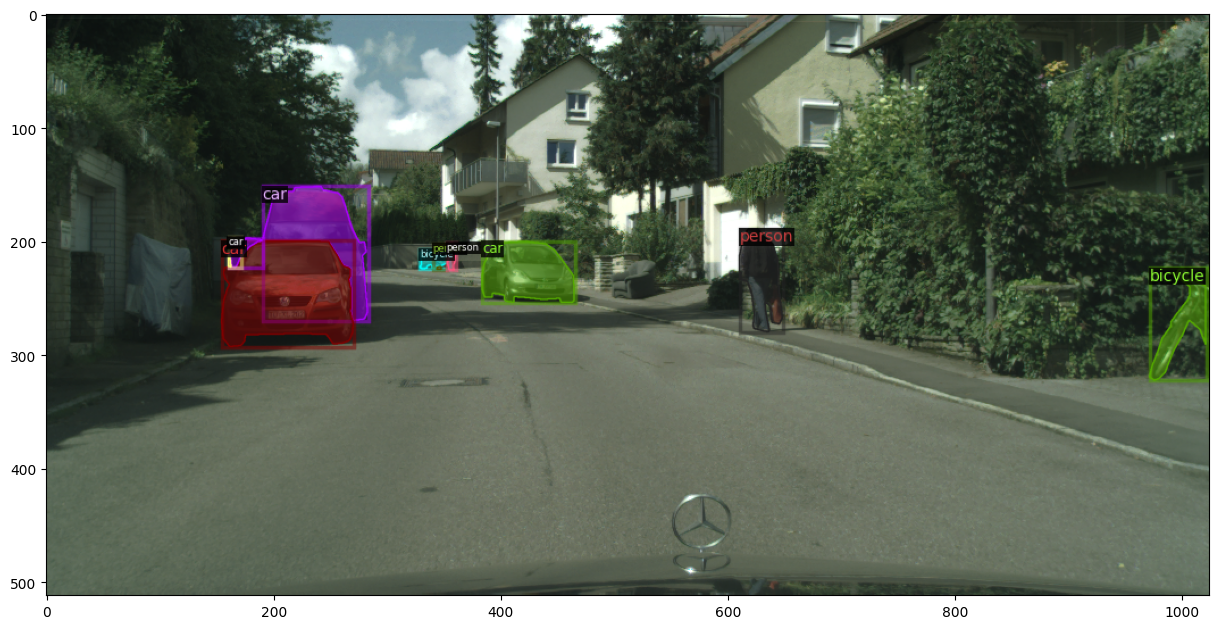

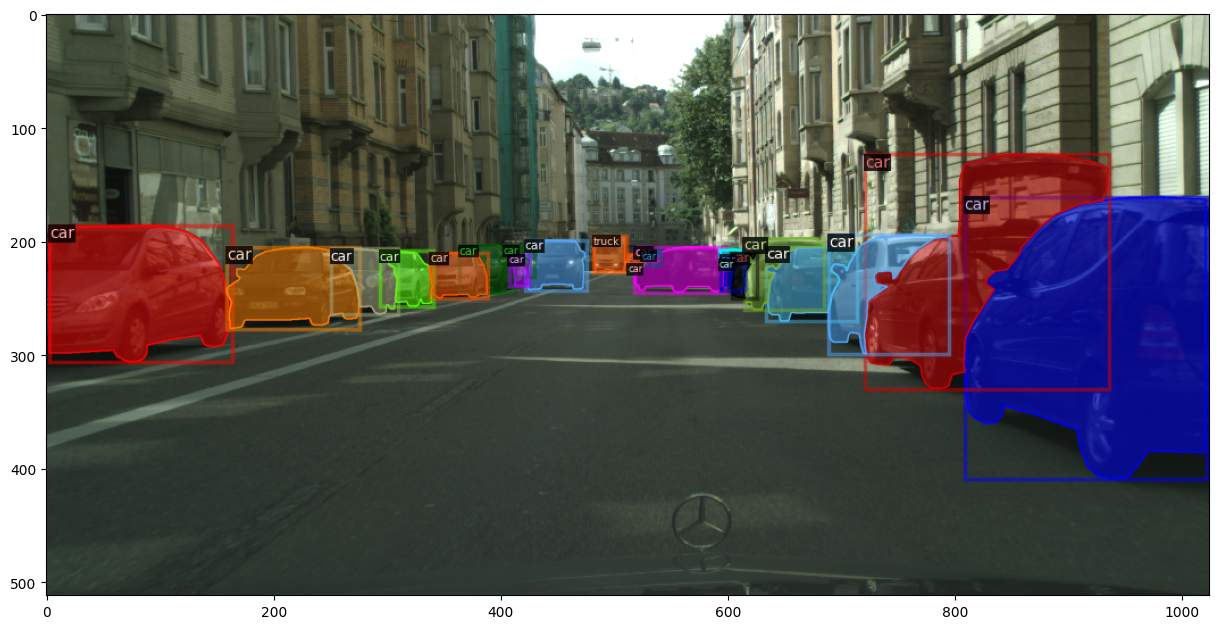

[05/21 03:16:52 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_2d9806.pkl: 431MB [00:02, 203MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[05/21 03:17:04 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[05/21 03:17:54 d2.utils.events]:  eta: 0:31:21  iter: 19  total_loss: 3.931  loss_cls: 2.154  loss_box_reg: 0.838  loss_mask: 0.6911  loss_rpn_cls: 0.08208  loss_rpn_loc: 0.2108    time: 1.9325  last_time: 1.9518  data_time: 0.0551  last_data_time: 0.0118   lr: 4.9953e-06  max_mem: 5519M
[05/21 03:18:42 d2.utils.events]:  eta: 0:31:37  iter: 39  total_loss: 3.941  loss_cls: 2.072  loss_box_reg: 0.8582  loss_mask: 0.6877  loss_rpn_cls: 0.08154  loss_rpn_loc: 0.2413    time: 2.0566  last_time: 2.0897  data_time: 0.0154  last_data_time: 0.0249   lr: 9.9902e-06  max_mem: 5519M
[05/21 03:19:23 d2.utils.events]:  eta: 0:31:21  iter: 59  total_loss: 3.723  loss_cls: 1.914  loss_box_reg: 0.828  loss_mask: 0.6811  loss_rpn_cls: 0.0505  loss_rpn_loc: 0.2722    time: 2.0450  last_time: 2.0180  data_time: 0.0162  last_data_time: 0.0125   lr: 1.4985e-05  max_mem: 5519M
[05/21 03:20:03 d2.utils.events]:  eta: 0:30:34  iter: 79  total_loss: 3.43  loss_cls: 1.662  loss_box_reg: 0.7738  loss_mask: 0.6

In [8]:
#Following segment of code: assists with training of the model

#import setup logger
from detectron2.utils.logger import setup_logger
setup_logger()

#register the dataset with detectron2
from detectron2.data.datasets import register_coco_instances

#import default trainer to train the models
from detectron2.engine import DefaultTrainer

#need to import other libraries
import os
import pickle


#Custom-Object Detection Code - for example using: R50-FPN3x (fast RCNN model)
#Speed and accuracy is a common trade-off between models
#Higher performance/accuracy - but lower speed
#Higher speed - but lower accuracy

#Corresponding link: 
#https://github.com/facebookresearch/detectron2/blob/main/configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml
#but remove ALL up to COCO-Detection, and enter this as config_file_path

#file path in Detectron2 for chosen model - Mask-RCNN X101
config_file_path = "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
#checkpoint URL in Detectron2 for chosen model - Mask-RCNN R50 X101
checkpoint_url = "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"

#specifying output model file
output_dir = "./output/instance_segmentation"

#Defining number of classes in the dataset
num_classes = 8

#train on CUDA (since CUDA present) (can also use cpu)
device = "cuda"

#Defines training dataset name, path, and annotation path
train_dataset_name = "LP2_train" 
train_images_path = "train" #define train images path
train_json_annot_path = "train.json" #define train.json path

#Defines test dataset name, path, and annotation path
test_dataset_name = "LP2_test" 
test_images_path = "test" #define test images path
test_json_annot_path = "test.json" #define test.json path

cfg_save_path = "IS_cfg.pickle" #EDIT: for object detection

########################

#Register dataset train and test with Detectron2

#Registers using dataset name, dataset metadata, path to annotations file,
#and where traindataset is located (image_root)

#Registers image dataset for 'training' model = train
register_coco_instances(name = train_dataset_name, metadata={}, json_file=train_json_annot_path, image_root=train_images_path)

#Registers image dataset for 'test' model = test
register_coco_instances(name = test_dataset_name, metadata={}, 
json_file=test_json_annot_path, image_root=test_images_path)

#run following to check verification:
plot_samples(dataset_name=train_dataset_name, n=2)

###########

def main():
  cfg = get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, test_dataset_name, num_classes, device, output_dir)

  with open(cfg_save_path, 'wb') as f:
    pickle.dump(cfg, f, protocol=pickle.HIGHEST_PROTOCOL)
  
  os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

  trainer = DefaultTrainer(cfg)
  trainer.resume_or_load(resume=False)

  trainer.train()

if __name__ =='__main__':
  main()



[05/21 04:08:32 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/instance_segmentation/model_final.pth ...


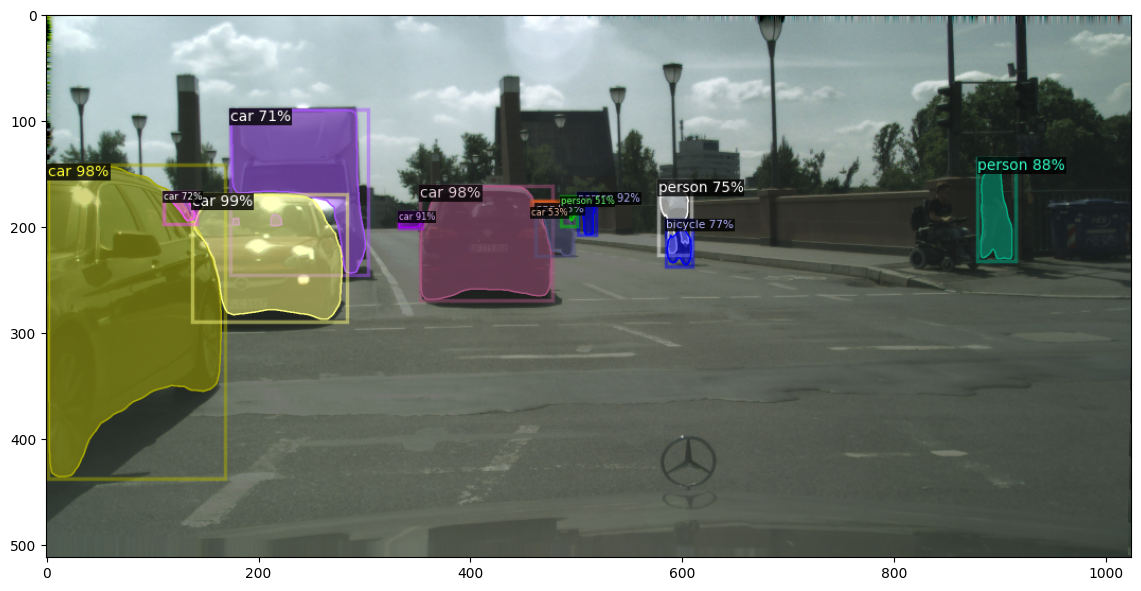

[05/21 04:08:37 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/instance_segmentation/model_final.pth ...


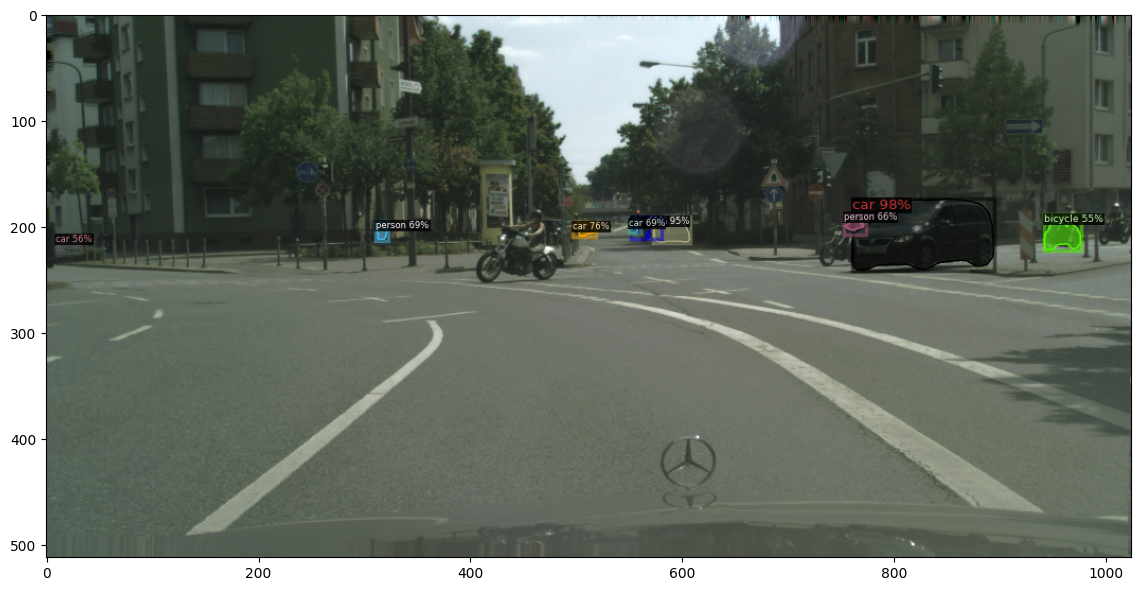

[05/21 04:08:42 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/instance_segmentation/model_final.pth ...


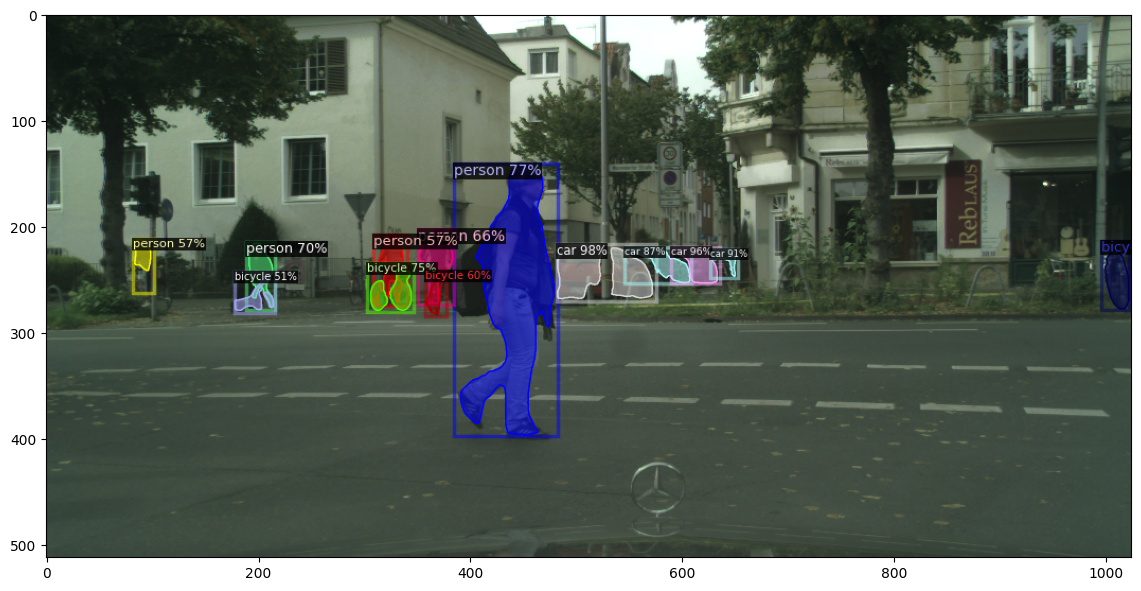

In [22]:
#Following segment of code: assists with outputting visualisations for 'test' images

#imports DefaultPredictor from Detectron2
from detectron2.engine import DefaultPredictor

#imports other required packages
import os
import pickle

#the pickle file path defined for output
cfg_save_path = "IS_cfg.pickle" #the saved pickle file

#load cfg
with open(cfg_save_path, 'rb') as f:
  cfg = pickle.load(f) #load cfg

#defined output director in configuration file - the cfg.OUTPUT_DIR
#Trainer saves final model as model_final.pth - will be in directory output folder
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth") 

#define threshold for detection 
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 #any object of confidence below 0.5 not displayed

#Visualisation 1:
predictor = DefaultPredictor(cfg) #default predictor will load custom model and use cfg file
#Define another function to test image from test folder
image_path = "test/frankfurt_000001_061682_leftImg8bit.png"
on_image(image_path, predictor)

#Visualisation 2:
predictor = DefaultPredictor(cfg) #default predictor will load custom model and use cfg file
#Define another function to test image from test folder
image_path = "test/frankfurt_000001_083199_leftImg8bit.png"
on_image(image_path, predictor)

#Visualisation 3:
predictor = DefaultPredictor(cfg) #default predictor will load custom model and use cfg file
#Define another function to test image from test folder
image_path = "test/munster_000102_000019_leftImg8bit.png"
on_image(image_path, predictor)


In [23]:
#Following segment of code: assists with producing evaluation metrics for required code

#imports required elements from Detectron2
from detectron2.engine import DefaultTrainer
from detectron2.engine import DefaultPredictor
from detectron2.evaluation import COCOEvaluator

#imports required packages
import os
import pickle

#load cfg

with open(cfg_save_path, 'rb') as f:
  cfg = pickle.load(f) #load cfg

#defined output director in configuration file - the cfg.OUTPUT_DIR
#Trainer saves final model as model_final.pth - will be in directory output folder
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth") 

#trainer config
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

# Evaluate on the test set
evaluator = COCOEvaluator(test_dataset_name,
  tasks=("segm",), # Use ("bbox",) for RetinaNet
  distributed=False,
  output_dir="maskrcnn_test_output")
trainer.test(cfg, trainer.model, evaluators=evaluator)


[05/21 04:09:57 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

OrderedDict([('segm',
              {'AP': 18.305247534804096,
               'AP50': 35.67093319712365,
               'AP75': 16.224315422255675,
               'APs': 2.530069936293991,
               'APm': 18.1047005763024,
               'APl': 38.51778697286885,
               'AP-person': 24.401678441553372,
               'AP-rider': 8.510944948831195,
               'AP-car': 41.848780716990106,
               'AP-bicycle': 12.403405587866986,
               'AP-bus': 30.62710215707906,
               'AP-motorcycle': 13.108158647413465,
               'AP-truck': 9.601315719292632,
               'AP-train': 5.940594059405939})])